<a href="https://colab.research.google.com/github/dreamboysatvik/handwritten-character-recognition/blob/main/Copy_of_Handwritten_Character_Recognition_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Handwritten Character Recognition - MLP + Crossentropy**
prepared by <br>
me


**Getting the Data.**


Preparing to load the [A-Z Handwritten Alphabets Dataset](https://www.kaggle.com/sachinpatel21/az-handwritten-alphabets-in-csv-format) From Kaggle using the Kaggle API.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

 96% 177M/185M [00:07<00:00, 25.1MB/s]
100% 185M/185M [00:07<00:00, 24.6MB/s]


Unzipping the zip file and subsequently removing it.

In [ ]:
!unzip \*.zip && rm *.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


Loading the dataset into a Pandas Dataframe.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/A_Z Handwritten Data.csv')

In [ ]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


**Pre Processing the Data.**

Changing the data type to float32 and renaming the first column as 'label'.

In [ ]:
data.astype('float32')
data.rename(columns={'0':'label'}, inplace=True)

Setting X and y.

In [ ]:
X = data.drop('label',axis = 1)
X = X.values
y = data['label']
y = y.values

In [ ]:
X.shape

(372450, 784)

In [ ]:
y.shape

(372450,)

Visualising an image.

In [ ]:
image = X[70050]
image = image.reshape(28,28)
label = y[70050]

Importing Matplotlib.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

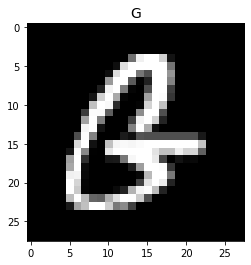

In [ ]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
plt.imshow(image, cmap='gray')
plt.title(alphabet[label].upper(),  fontdict={'fontsize': 14})
plt.show()

Performing some more Data Visualisation using Matplotlib and Seaborn.

In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

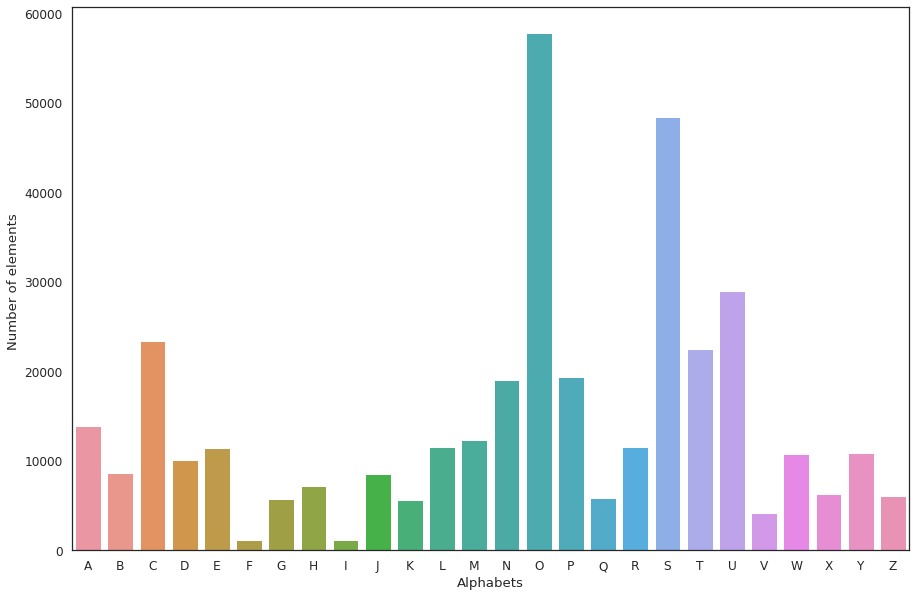

In [ ]:
import seaborn as sns
sns.set_context(context='notebook', font_scale=1.1)
sns.set_style('white')
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.barplot(x = alphabets,y = count)
plt.xlabel("Alphabets")
plt.ylabel("Number of elements")
plt.show()

Spliting the X and y data into the ratio of 6:4, 4 is the validation data size.

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_valid, Y_train, Y_valid) = train_test_split(X, y, test_size=0.4)

Turning our scalar targets into binary categories.

In [ ]:
import tensorflow.keras as keras
num_classes = 26
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_valid = keras.utils.to_categorical(Y_valid, num_classes)

Normalising  our image data.

In [ ]:
X_train = X_train / 255
X_valid = X_valid / 255


**Creating the Model.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape = (784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

Model Summary.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 26)                6682      
Total params: 934,170
Trainable params: 934,170
Non-trainable params: 0
__________________________________________________

Compiling the model with Categorical Crossentropy Loss Function.

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the Model for 10 epochs.

In [ ]:
model.fit(X_train, Y_train, epochs=10, verbose=1, validation_data=(X_valid, Y_valid))

Epoch 1/10
6984/6984 [==============================] - 93s 13ms/step - loss: 0.2579 - accuracy: 0.9267 - val_loss: 0.1348 - val_accuracy: 0.9610
Epoch 2/10
6984/6984 [==============================] - 98s 14ms/step - loss: 0.1317 - accuracy: 0.9644 - val_loss: 0.1102 - val_accuracy: 0.9712
Epoch 3/10
6984/6984 [==============================] - 98s 14ms/step - loss: 0.1014 - accuracy: 0.9722 - val_loss: 0.0984 - val_accuracy: 0.9739
Epoch 4/10
6984/6984 [==============================] - 100s 14ms/step - loss: 0.0872 - accuracy: 0.9768 - val_loss: 0.1176 - val_accuracy: 0.9699
Epoch 5/10
6984/6984 [==============================] - 103s 15ms/step - loss: 0.0773 - accuracy: 0.9797 - val_loss: 0.1009 - val_accuracy: 0.9745
Epoch 6/10
6984/6984 [==============================] - 99s 14ms/step - loss: 0.0716 - accuracy: 0.9812 - val_loss: 0.0838 - val_accuracy: 0.9809
Epoch 7/10
6984/6984 [==============================] - 98s 14ms/step - loss: 0.0645 - accuracy: 0.9834 - val_loss: 0.1083

Pictorial representation of the model.

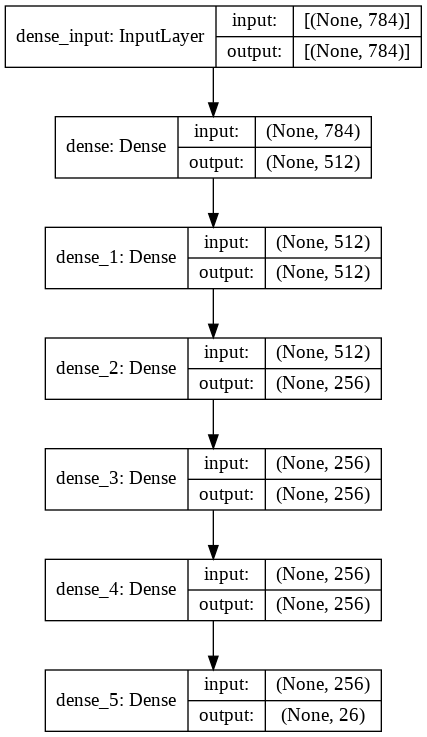

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Predicting an image with the model.**

Showing the image.

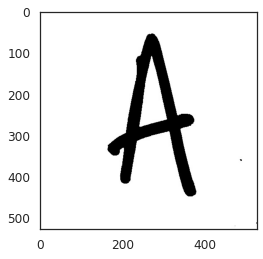

In [ ]:
import matplotlib.image as mpimg
image = mpimg.imread('/content/image.jpg')
plt.imshow(image, cmap='gray')
plt.show()

Scaling the image.

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
image = image_utils.load_img('/content/image.jpg', color_mode="grayscale", target_size=(28,28))

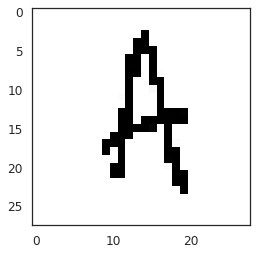

In [ ]:
plt.imshow(image, cmap='gray')
plt.show()

Processing the image for prediction.

In [ ]:
processed_image = image_utils.img_to_array(image)

In [ ]:
processed_image = processed_image / 255

In [ ]:
processed_image.shape

(28, 28, 1)

In [ ]:
processed_image = processed_image.reshape(1,784)

In [ ]:
processed_image.shape

(1, 784)


Making prediction.



In [ ]:
prediction = model.predict(processed_image)
print(prediction)

[[1.0000000e+00 1.1653770e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.3830084e-34 1.6496620e-11 0.0000000e+00 0.0000000e+00
  1.5454713e-31 0.0000000e+00 1.5460476e-33 3.9226847e-21 3.1209852e-31
  3.8172371e-38 0.0000000e+00 6.6722684e-24 1.2256158e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00]]


Understanding the Prediction.

In [ ]:
print(f'Predicted Letter: {alphabet[np.argmax(prediction)].upper()}')

Predicted Letter: A
